## Plot earthquake magnitudes on map

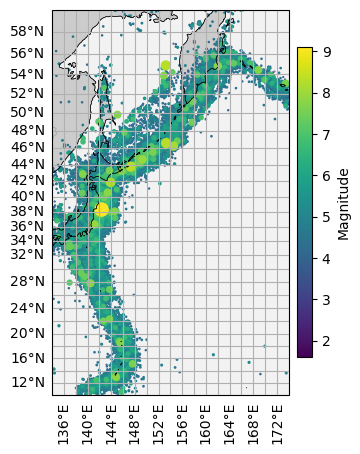

In [1]:
import cartopy.crs as crs
import cartopy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mticker

df = pd.read_csv('data/Japan_10_60_134_174_1973_2023_V2.csv').sort_values('Magnitude')
# Create a map using Cartopy to display earthquake data with magnitudes, longitude, and latitude
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1, projection=crs.Mercator())
ax.add_feature(cartopy.feature.LAND, facecolor=[.8,.8,.8])
ax.add_feature(cartopy.feature.OCEAN, facecolor=[.95,.95,.95])
ax.add_feature(cartopy.feature.COASTLINE,linewidth=0.3)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':',linewidth=0.3)

# Add gridlines
lon = np.linspace(-180,180,181)
lat = np.linspace(-90,90,91)

gl = ax.gridlines(draw_labels=True)
gl.xlocator = mticker.FixedLocator(lon)
gl.ylocator = mticker.FixedLocator(lat)
gl.top_labels = gl.right_labels = False
gl.rotate_labels = True
#gl.xlabel_style = {'rotation': 45}

# Add coastlines
ax.coastlines(color='black', linewidth=0.5)

# Plot the earthquake data as scatter points
sc = ax.scatter(df['Longitude'], df['Latitude'], c=df['Magnitude'], cmap="viridis", s=np.exp(df['Magnitude'])/100, transform=crs.PlateCarree())

# Set the colorbar and its label
cbar = fig.colorbar(sc, ax=ax, fraction=0.04, pad=0.02)
cbar.set_label('Magnitude')

# Set the plot title and axis labels
# ax.set_title('Earthquakes between 1973 and 2023')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# Set the bounds of the map to the minimum and maximum longitude and latitude values
# Determine the minimum and maximum longitude and latitude values
min_lon, max_lon = df['Longitude'].min(), df['Longitude'].max()
min_lat, max_lat = df['Latitude'].min(), df['Latitude'].max()
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=crs.PlateCarree())


# Show the plot
plt.savefig('graphs/japan_map.png')
plt.show()

## Plot earthquake magnitudes over time

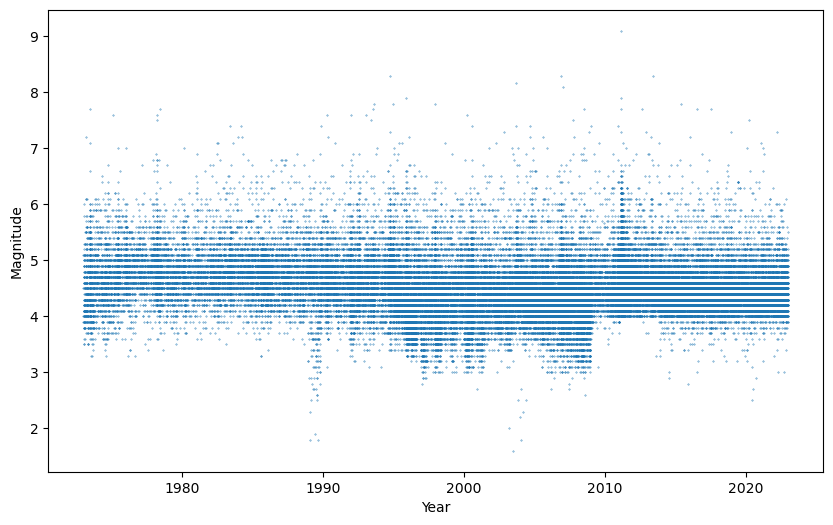

In [2]:
import matplotlib.pyplot as plt

df['Time'] = pd.to_datetime(df.Time)

fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(df.Time, df.Magnitude, s=.1)
plt.ylabel('Magnitude')
plt.xlabel('Year')

# Show the plot
plt.savefig('graphs/japan_scatter.png')
plt.show()

## Plot earthquake depth over time

Text(0.5, 0, 'Year')

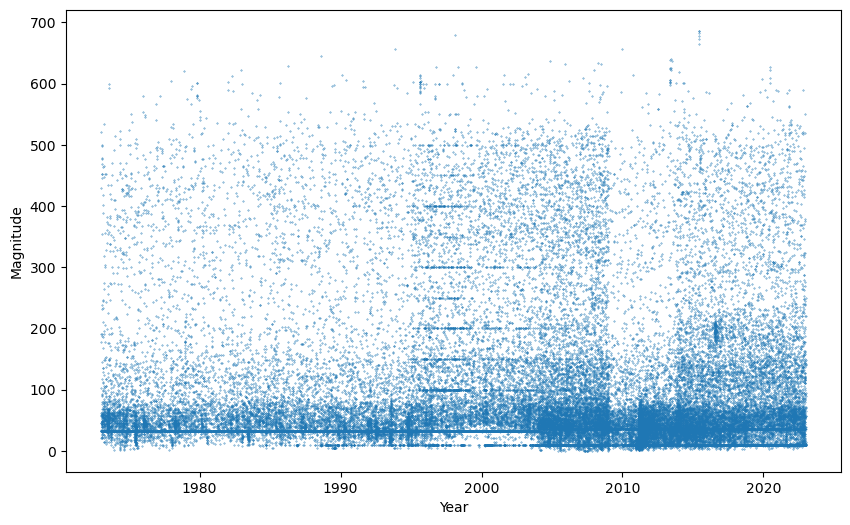

In [3]:
import matplotlib.pyplot as plt

df['Time'] = pd.to_datetime(df.Time)

fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(df.Time, df.Depth, s=.1)
plt.ylabel('Magnitude')
plt.xlabel('Year')

## Plot 2D histogram of amount of earthquakes

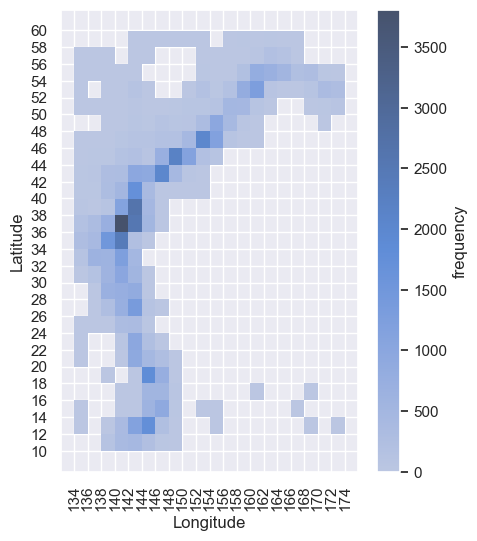

In [4]:
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv('data/Japan_10_60_134_174_1973_2023_V2.csv')
df['Time'] = pd.to_datetime(df.Time)
df = df.set_index('Time')
df = df.sort_index()

sns.set(rc={'figure.figsize':(4.8,6)})
g = sns.histplot(
    df, x="Longitude", y="Latitude",
    bins=(20,25), cbar=True, cbar_kws={'label': 'frequency'})

g.set_xticks(ticks=np.linspace(134, 174, 21), labels=np.linspace(134, 174, 21).astype(int), rotation = 90)
g.set_yticks(ticks=np.linspace(10, 60, 26), labels=np.linspace(10, 60, 26).astype(int))
sns.set(rc={'figure.figsize':(8,8)})

## Plot distribution of earthquakes

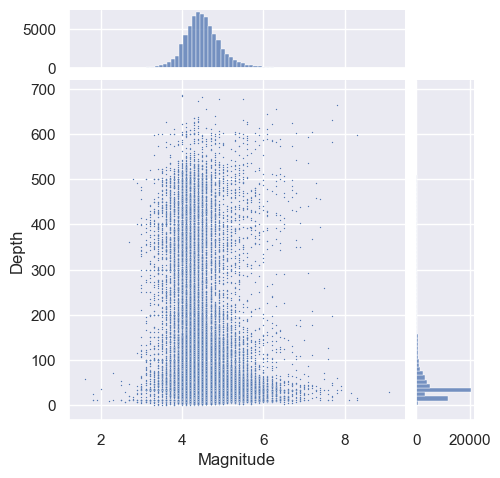

In [5]:
import seaborn as sns
sns.jointplot(
    data=df, x="Magnitude", y="Depth", s=1, marginal_ticks=True, marginal_kws=dict(bins=74), height=5
)
plt.savefig('graphs/japan_hist.png')
plt.show()